In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('prediction.csv')

In [4]:
df.head()

,Unnamed: 0,country,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0,0,0,0,0,0,0,0,0,0
1,1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,0,0,1,0,0,0,0,0,0,0
2,2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0,0,0,0,0,1,0,0,0,0
3,3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,0,0,0,0,0,0,0,1,0,0
4,4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0,0,0,0,0,0,0,0,0,1


##### Data Split 1: all of our final dataset, no scaling

In [8]:
y = df['gdp_per_capita']
X = df.drop(['gdp_per_capita','country'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

##### Data Split 2: all of our final dataset, with scaling

In [10]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

##### Data Split 3: feature selected dataset, no scaling

In [12]:
y3 = y
X3 = df.drop(['gdp_per_capita','country','population', 'area', 'coastline_area_ratio', 'arable',
                      'crops', 'other', 'climate', 'deathrate', 'industry'], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

##### Data Split 4: feature selected dataset, with scaling

In [14]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

## Linear Regression

From our EDA, we can see that most features do not have a linear relationship with our labels (gdp_per_capita), yet we will try linear regression, and use the result as a reference (other methods should have better results).

##### Model Training

In [17]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

lm4 = LinearRegression()
lm4.fit(X4_train,y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Predictions

In [18]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)
lm3_pred = lm3.predict(X3_test)
lm4_pred = lm4.predict(X4_test)

##### Evaluation

In [34]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, lm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, lm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, lm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, lm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, lm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, lm4_pred))

Linear Regression Performance:

all features, No scaling:
MAE: 329171.7397435003
RMSE: 1564744.808311586
R2_Score:  -29630.92001658731

all features, with scaling:
MAE: 567004.4781270018
RMSE: 1278610.8291965171
R2_Score:  -19784.613034778133

selected features, No scaling:
MAE: 2946.4499627575697
RMSE: 4086.3827099135337
R2_Score:  0.7979072050531746

selected features, with scaling:
MAE: 2870.9986609422162
RMSE: 3743.7729352778474
R2_Score:  0.8303742601709817


From the metrics above, it is clear that feature selection is essential for linear regression model training, in order to get acceptable results on this dataset. On the other hand, feature scaling has a small positive effect on LR's prediction performance. we got decent prediction performance from LR with feature selection and scaling.

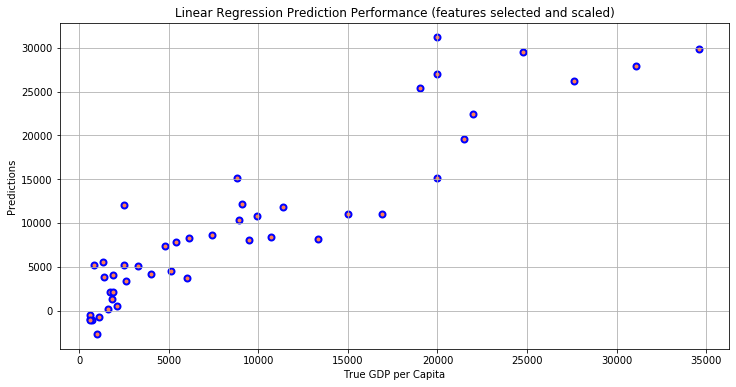

In [52]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,lm4_pred, linewidths=2, edgecolors='b', color='coral')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

From the metrics above, it is clear that feature selection is essential for linear regression model training, in order to get acceptable results on this dataset. On the other hand, feature scaling has a small positive effect on LR's prediction performance.
we got decent prediction performance from LR with feature selection and scaling.